#**Forest Cover Type Prediction**


# **Problem Description:**

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch.
The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.
You are asked to predict an integer classification for the forest cover type. The seven types are:

* cover type 1 = Spruce/Fir
* cover type 2 = Lodgepole Pine
* cover type 3 = Ponderosa Pine
* cover type 4 = Cottonwood/Willow
* cover type 5 = Aspen
* cover type 6 = Douglas-fir
* cover type 7 = Krummholz

# **Data** **contained**:
**Features of data**
* Elevation - Elevation in meters.
* Aspect - Aspect in degrees azimuth.
* Slope - Slope in degrees.
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features.
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway.
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice.
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice.
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice.
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points.
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation.
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation.
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation.



**The wilderness areas are:**

* 1 - Rawah Wilderness Area
* 2 - Neota Wilderness Area
* 3 - Comanche Peak Wilderness Area
* 4 - Cache la Poudre Wilderness Area

**The soil types are:**

* 1 Cathedral family - Rock outcrop complex, extremely stony.
* 2 Vanet - Ratake families complex, very stony.
* 3 Haploborolis - Rock outcrop complex, rubbly.
* 4 Ratake family - Rock outcrop complex, rubbly.
* 5 Vanet family - Rock outcrop complex complex, rubbly.
* 6 Vanet - Wetmore families - Rock outcrop complex, stony.
* 7 Gothic family.
* 8 Supervisor - Limber families complex.
* 9 Troutville family, very stony.
* 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
* 11 Bullwark - Catamount families - Rock land complex, rubbly.
* 12 Legault family - Rock land complex, stony.
* 13 Catamount family - Rock land - Bullwark family complex, rubbly.
* 14 Pachic Argiborolis - Aquolis complex.
* 15 unspecified in the USFS Soil and ELU Survey.
* 16 Cryaquolis - Cryoborolis complex.
* 17 Gateview family - Cryaquolis complex.
* 18 Rogert family, very stony.
* 19 Typic Cryaquolis - Borohemists complex.
* 20 Typic Cryaquepts - Typic Cryaquolls complex.
* 21 Typic Cryaquolls - Leighcan family, till substratum complex.
* 22 Leighcan family, till substratum, extremely bouldery.
* 23 Leighcan family, till substratum - Typic Cryaquolls complex.
* 24 Leighcan family, extremely stony.
* 25 Leighcan family, warm, extremely stony.
* 26 Granile - Catamount families complex, very stony.
* 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
* 28 Leighcan family - Rock outcrop complex, extremely stony.
* 29 Como - Legault families complex, extremely stony.
* 30 Como family - Rock land - Legault family complex, extremely stony.
* 31 Leighcan - Catamount families complex, extremely stony.
* 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
* 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
* 34 Cryorthents - Rock land complex, extremely stony.
* 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
* 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
* 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
* 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
* 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
* 40 Moran family - Cryorthents - Rock land complex, extremely stony.

# import libraries

In [2]:
pip install minisom

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from matplotlib import cm
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.feature_selection import SelectKBest

# Helper Functions

In [4]:
# function for TSNE visualization
def tens(X_data ,y_data,title):
  # Define a list of class names
  #class_names = ['Cover type 1', 'Cover type 2', 'Cover type 3', 'Cover type 4', 'Cover type 5', 'Cover type 6', 'Cover type 7']
  colormap = plt.cm.get_cmap('viridis', len(set(y_data)))  # Change the colormap as needed
  # Perform t-SNE dimensionality reduction on test set
  tsne_data = TSNE(n_components=2).fit_transform(X_data)
  # Plot t-SNE visualization for test set
  plt.figure(figsize=(8, 6))
  for i, Cover_type in enumerate(set(y_data)):
    plt.scatter(tsne_data[y_data == Cover_type, 0], tsne_data[y_data == Cover_type, 1], label=f'Cover_type {Cover_type}', c=[colormap(i)], s=50)
  plt.title(title)
  plt.xlabel('Dimension 1')
  plt.ylabel('Dimension 2')
  plt.legend()
  plt.show()

In [5]:
def plot(cmo,title):
  sns.heatmap(cmo ,cmap='viridis',annot=True,cbar_kws={'label':'color bar'},xticklabels=[1,2,3,4,5,6,7],yticklabels=[1,2,3,4,5,6,7],fmt='.1f')
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title(title)
  plt.show()

# load data

In [6]:
train_data=pd.read_csv("training_dataset.csv")
validation_data=pd.read_csv('validation_dataset.csv')
test_data=pd.read_csv('test_dataset.csv')

In [7]:
# merge the train and test data to use
# Concatenate the dataframes into a single dataframe
data_cluster = pd.concat([train_data, test_data], axis=0)
# Print the shape of the combined dataframe
print("Combined dataframe shape: ", data_cluster.shape)
data_cluster

Combined dataframe shape:  (9811, 56)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,8192,2976,85,23,95,72,2436,246,193,64,...,0,0,0,0,0,0,0,0,0,1
1,14089,3104,233,12,150,40,1503,200,251,186,...,0,0,0,0,0,0,0,0,0,1
2,10246,3385,160,7,937,204,1224,228,242,147,...,0,0,0,0,0,0,0,0,0,1
3,8686,3191,41,14,210,37,3207,221,208,119,...,1,0,0,0,0,0,0,0,0,1
4,9242,2821,297,4,85,1,992,208,238,169,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,11604,2850,99,23,67,18,4909,250,201,65,...,0,0,0,0,0,0,0,0,0,1
1521,13693,2562,58,22,85,26,331,230,187,79,...,0,0,0,0,0,0,0,0,0,6
1522,2348,2784,88,12,180,-2,510,238,220,112,...,0,0,0,0,0,0,0,0,0,5
1523,12422,2343,184,14,361,232,912,223,249,156,...,0,0,0,0,0,0,0,0,0,4


# insights about the data (EDA)


# EDA

#**Train data**

In [8]:
# Print the shape
print("train dataframe shape: ", train_data.shape)
print(train_data.info())
train_data

train dataframe shape:  (8286, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  8286 non-null   int64
 1   Elevation                           8286 non-null   int64
 2   Aspect                              8286 non-null   int64
 3   Slope                               8286 non-null   int64
 4   Horizontal_Distance_To_Hydrology    8286 non-null   int64
 5   Vertical_Distance_To_Hydrology      8286 non-null   int64
 6   Horizontal_Distance_To_Roadways     8286 non-null   int64
 7   Hillshade_9am                       8286 non-null   int64
 8   Hillshade_Noon                      8286 non-null   int64
 9   Hillshade_3pm                       8286 non-null   int64
 10  Horizontal_Distance_To_Fire_Points  8286 non-null   int64
 11  Wilderness_Area1                  

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,8192,2976,85,23,95,72,2436,246,193,64,...,0,0,0,0,0,0,0,0,0,1
1,14089,3104,233,12,150,40,1503,200,251,186,...,0,0,0,0,0,0,0,0,0,1
2,10246,3385,160,7,937,204,1224,228,242,147,...,0,0,0,0,0,0,0,0,0,1
3,8686,3191,41,14,210,37,3207,221,208,119,...,1,0,0,0,0,0,0,0,0,1
4,9242,2821,297,4,85,1,992,208,238,169,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8281,9216,3294,328,13,624,192,3506,188,224,175,...,0,0,0,0,0,0,0,0,1,7
8282,7129,3390,24,6,216,13,3332,217,226,146,...,0,0,0,0,0,1,0,0,0,7
8283,9231,3350,100,18,175,-26,2121,247,212,88,...,0,0,0,0,0,0,1,0,0,7
8284,9656,3727,5,17,984,318,4934,195,204,143,...,0,0,0,0,0,0,0,0,1,7


In [9]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,8286.0,7609.998431,4291.741503,1.0,3889.5,7479.5,11349.75,15120.0
Elevation,8286.0,2732.983104,432.906958,1863.0,2350.0,2720.5,3099.75,3849.0
Aspect,8286.0,155.366643,108.392758,0.0,66.0,125.0,252.00,360.0
Slope,8286.0,16.868694,8.514811,0.0,10.0,16.0,23.00,50.0
Horizontal_Distance_To_Hydrology,8286.0,225.249698,213.670866,0.0,60.0,175.0,323.00,1343.0
Vertical_Distance_To_Hydrology,8286.0,53.233888,62.890107,-134.0,5.0,34.0,84.00,547.0
Horizontal_Distance_To_Roadways,8286.0,1629.840574,1259.714393,0.0,726.0,1273.0,2155.00,6508.0
Hillshade_9am,8286.0,213.732682,30.675904,58.0,197.0,221.0,237.00,254.0
Hillshade_Noon,8286.0,218.534999,23.142959,99.0,206.0,222.0,235.00,254.0
Hillshade_3pm,8286.0,133.007120,46.730190,0.0,103.0,136.0,166.00,248.0


#**Validation data**

In [10]:
# Print the shape
print("validation dataframe shape: ", validation_data.shape)
print(validation_data.info())
validation_data

validation dataframe shape:  (1498, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  1498 non-null   int64
 1   Elevation                           1498 non-null   int64
 2   Aspect                              1498 non-null   int64
 3   Slope                               1498 non-null   int64
 4   Horizontal_Distance_To_Hydrology    1498 non-null   int64
 5   Vertical_Distance_To_Hydrology      1498 non-null   int64
 6   Horizontal_Distance_To_Roadways     1498 non-null   int64
 7   Hillshade_9am                       1498 non-null   int64
 8   Hillshade_Noon                      1498 non-null   int64
 9   Hillshade_3pm                       1498 non-null   int64
 10  Horizontal_Distance_To_Fire_Points  1498 non-null   int64
 11  Wilderness_Area1             

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,6078,2432,147,16,90,2,484,240,236,120,...,0,0,0,0,0,0,0,0,0,6
1,7895,2653,114,14,175,38,2278,244,225,107,...,0,0,0,0,0,0,0,0,0,3
2,6821,3542,315,31,255,130,3218,124,198,206,...,0,0,0,0,0,0,0,0,1,1
3,1594,3191,286,20,30,12,4965,162,235,212,...,0,0,0,0,0,0,0,0,0,1
4,11987,2160,64,37,190,96,240,225,140,15,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,4257,2062,75,12,0,0,420,234,217,113,...,0,0,0,0,0,0,0,0,0,4
1494,812,2926,67,12,324,45,3055,232,217,116,...,0,0,0,0,0,0,0,0,0,2
1495,7717,2595,98,19,190,0,1883,248,209,81,...,0,0,0,0,0,0,0,0,0,6
1496,8662,2820,257,15,127,23,2496,183,248,202,...,0,0,0,0,0,0,0,0,0,2


In [11]:
validation_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1498.0,7562.141522,4356.857926,9.0,3693.50,7713.0,11214.75,15119.0
Elevation,1498.0,2749.556742,424.443747,1879.0,2376.00,2755.0,3127.75,3702.0
Aspect,1498.0,160.700267,108.854006,0.0,73.00,132.0,260.75,360.0
Slope,1498.0,16.697597,8.544512,1.0,10.00,16.0,23.00,48.0
Horizontal_Distance_To_Hydrology,1498.0,229.946595,211.628457,0.0,67.00,180.0,328.50,1261.0
Vertical_Distance_To_Hydrology,1498.0,51.189586,62.357847,-115.0,4.00,32.0,77.00,554.0
Horizontal_Distance_To_Roadways,1498.0,1711.573431,1305.919072,30.0,782.00,1339.0,2309.00,6890.0
Hillshade_9am,1498.0,212.061415,31.237923,89.0,194.25,220.0,236.00,254.0
Hillshade_Noon,1498.0,219.622163,22.836852,107.0,207.00,223.0,236.00,254.0
Hillshade_3pm,1498.0,136.323765,45.932031,0.0,108.00,141.0,168.00,241.0




---


#**Test data**



In [12]:
# Print the shape
print("test dataframe shape: ", test_data.shape)
print(test_data.info())
test_data

test dataframe shape:  (1525, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  1525 non-null   int64
 1   Elevation                           1525 non-null   int64
 2   Aspect                              1525 non-null   int64
 3   Slope                               1525 non-null   int64
 4   Horizontal_Distance_To_Hydrology    1525 non-null   int64
 5   Vertical_Distance_To_Hydrology      1525 non-null   int64
 6   Horizontal_Distance_To_Roadways     1525 non-null   int64
 7   Hillshade_9am                       1525 non-null   int64
 8   Hillshade_Noon                      1525 non-null   int64
 9   Hillshade_3pm                       1525 non-null   int64
 10  Horizontal_Distance_To_Fire_Points  1525 non-null   int64
 11  Wilderness_Area1                   

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,8405,2823,104,20,573,191,2608,249,210,80,...,0,0,0,0,0,0,0,0,0,3
1,13220,2453,157,7,474,183,806,228,241,146,...,0,0,0,0,0,0,0,0,0,3
2,7650,3156,110,6,162,24,1101,230,234,138,...,0,0,0,0,0,0,0,0,0,1
3,14941,2471,186,16,175,67,972,221,250,157,...,0,0,0,0,0,0,0,0,0,3
4,12548,2292,177,29,443,152,1315,219,242,134,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,11604,2850,99,23,67,18,4909,250,201,65,...,0,0,0,0,0,0,0,0,0,1
1521,13693,2562,58,22,85,26,331,230,187,79,...,0,0,0,0,0,0,0,0,0,6
1522,2348,2784,88,12,180,-2,510,238,220,112,...,0,0,0,0,0,0,0,0,0,5
1523,12422,2343,184,14,361,232,912,223,249,156,...,0,0,0,0,0,0,0,0,0,4


In [13]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1525.0,7559.973770,4388.971897,4.0,3781.0,7655.0,11499.0,15117.0
Elevation,1525.0,2735.860984,430.089563,1874.0,2349.0,2751.0,3102.0,3825.0
Aspect,1525.0,151.527213,108.633930,0.0,62.0,121.0,243.0,359.0
Slope,1525.0,16.545574,8.511536,0.0,10.0,15.0,22.0,46.0
Horizontal_Distance_To_Hydrology,1525.0,231.399344,222.534352,0.0,60.0,175.0,330.0,1260.0
Vertical_Distance_To_Hydrology,1525.0,53.087213,64.622797,-108.0,6.0,33.0,78.0,403.0
Horizontal_Distance_To_Roadways,1525.0,1694.068197,1309.355305,30.0,781.0,1318.0,2230.0,6660.0
Hillshade_9am,1525.0,214.243934,29.533171,65.0,199.0,221.0,236.0,254.0
Hillshade_Noon,1525.0,218.283279,23.159036,111.0,206.0,222.0,234.0,254.0
Hillshade_3pm,1525.0,132.590820,45.322776,0.0,105.0,135.0,164.0,240.0




---


"Our datasets consists of 3 dataset used :[train & validation & test]
* In Train data their are a  8286 samples , 55 features and one target,
* In Test data their are a  1525 samples , 55 features  and one target,
* In validation data their are a  1498 samples , 55 features  and one target,

the total data contains 11309 rows × 56 columns

---



 where each sample is a numerical measurement of various characteristics of a Forest. The features include the Elevation, Aspect , Slope ,Horizontal_Distance_To_Hydrology , Vertical_Distance_To_Hydrology ,
, Horizontal_Distance_To_Roadways ,Hillshade_9am ,Hillshade_Noon , Hillshade_3pm ,Horizontal_Distance_To_Fire_Points , 4 binary data of Wilderness_Area, 40 binary data of Soil_Type,7 types of Cover_Type.

The data are in the form of a CSVs files.

---



#**The whole data**

In [14]:
# Concatenate the dataframes into a single dataframe
whole_data = pd.concat([train_data, validation_data, test_data], axis=0)
ModelTrainData=pd.concat([train_data, validation_data ],axis=0)
# Print the shape of the combined dataframe
print("Combined dataframe shape: ", whole_data.shape)
whole_data

Combined dataframe shape:  (11309, 56)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,8192,2976,85,23,95,72,2436,246,193,64,...,0,0,0,0,0,0,0,0,0,1
1,14089,3104,233,12,150,40,1503,200,251,186,...,0,0,0,0,0,0,0,0,0,1
2,10246,3385,160,7,937,204,1224,228,242,147,...,0,0,0,0,0,0,0,0,0,1
3,8686,3191,41,14,210,37,3207,221,208,119,...,1,0,0,0,0,0,0,0,0,1
4,9242,2821,297,4,85,1,992,208,238,169,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,11604,2850,99,23,67,18,4909,250,201,65,...,0,0,0,0,0,0,0,0,0,1
1521,13693,2562,58,22,85,26,331,230,187,79,...,0,0,0,0,0,0,0,0,0,6
1522,2348,2784,88,12,180,-2,510,238,220,112,...,0,0,0,0,0,0,0,0,0,5
1523,12422,2343,184,14,361,232,912,223,249,156,...,0,0,0,0,0,0,0,0,0,4


In [15]:
# Sort the dataframe by the ID column
data_sorted = whole_data.sort_values(by='Id')

# Print the sorted dataframe
data_sorted

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
4539,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
5378,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
703,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
58,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
5168,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,15114,2688,104,15,443,10,805,245,219,99,...,0,0,0,0,0,0,0,0,0,3
663,15115,2670,108,12,624,24,730,241,225,112,...,0,0,0,0,0,0,0,0,0,3
267,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
952,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


In [16]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11309 entries, 0 to 1524
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  11309 non-null  int64
 1   Elevation                           11309 non-null  int64
 2   Aspect                              11309 non-null  int64
 3   Slope                               11309 non-null  int64
 4   Horizontal_Distance_To_Hydrology    11309 non-null  int64
 5   Vertical_Distance_To_Hydrology      11309 non-null  int64
 6   Horizontal_Distance_To_Roadways     11309 non-null  int64
 7   Hillshade_9am                       11309 non-null  int64
 8   Hillshade_Noon                      11309 non-null  int64
 9   Hillshade_3pm                       11309 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  11309 non-null  int64
 11  Wilderness_Area1                    11309 non-null  int64
 12  Wilde

In [17]:
whole_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,11309.0,7596.913520,4313.300672,1.0,3854.0,7531.0,11348.0,15120.0
Elevation,11309.0,2735.566540,431.413795,1863.0,2353.0,2727.0,3106.0,3849.0
Aspect,11309.0,155.555398,108.503237,0.0,67.0,125.0,252.0,360.0
Slope,11309.0,16.802458,8.518352,0.0,10.0,16.0,23.0,50.0
Horizontal_Distance_To_Hydrology,11309.0,226.701123,214.613966,0.0,60.0,175.0,324.0,1343.0
Vertical_Distance_To_Hydrology,11309.0,52.943319,63.054654,-134.0,5.0,34.0,82.0,554.0
Horizontal_Distance_To_Roadways,11309.0,1649.327969,1273.005160,0.0,741.0,1283.0,2186.0,6890.0
Hillshade_9am,11309.0,213.580246,30.603276,58.0,197.0,221.0,236.0,254.0
Hillshade_Noon,11309.0,218.645061,23.106100,99.0,206.0,222.0,235.0,254.0
Hillshade_3pm,11309.0,133.390309,46.447891,0.0,104.0,137.0,166.0,248.0


In [18]:
# Check for null values in the dataframe
null_counts=whole_data.isnull().sum()

# Print the number of null values for each column
print("Null counts:\n", null_counts)

Null counts:
 Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10               



---


**The data dosen't containg any Null values or missing data**

---



In [19]:
# counts value  target 'Cover_Type'
class_label =whole_data['Cover_Type'].value_counts()
class_label

7    2160
5    1985
4    1817
3    1813
6    1468
2    1298
1     768
Name: Cover_Type, dtype: int64

In [20]:
# counts value  target 'Cover_Type'
class_label =ModelTrainData['Cover_Type'].value_counts()
class_label

7    1944
5    1770
3    1618
4    1570
6    1243
2    1068
1     571
Name: Cover_Type, dtype: int64

In [21]:
for column in train_data.columns:
    print(f"{column} has unique values ({train_data[column].nunique()})")

Id has unique values (8286)
Elevation has unique values (1580)
Aspect has unique values (361)
Slope has unique values (50)
Horizontal_Distance_To_Hydrology has unique values (362)
Vertical_Distance_To_Hydrology has unique values (383)
Horizontal_Distance_To_Roadways has unique values (2443)
Hillshade_9am has unique values (168)
Hillshade_Noon has unique values (132)
Hillshade_3pm has unique values (243)
Horizontal_Distance_To_Fire_Points has unique values (2115)
Wilderness_Area1 has unique values (2)
Wilderness_Area2 has unique values (2)
Wilderness_Area3 has unique values (2)
Wilderness_Area4 has unique values (2)
Soil_Type1 has unique values (2)
Soil_Type2 has unique values (2)
Soil_Type3 has unique values (2)
Soil_Type4 has unique values (2)
Soil_Type5 has unique values (2)
Soil_Type6 has unique values (2)
Soil_Type7 has unique values (1)
Soil_Type8 has unique values (2)
Soil_Type9 has unique values (2)
Soil_Type10 has unique values (2)
Soil_Type11 has unique values (2)
Soil_Type12 

# spliting data

In [22]:
# spliting the data
#train
X_train=train_data.iloc[: , 0:55]
y_train=train_data.iloc[: , 55]
# TEST
X_test=test_data.iloc[: , 0:55]
y_test=test_data.iloc[: , 55]
# validation
X_val=validation_data.iloc[: , 0:55]
y_val=validation_data.iloc[: , 55]

# visualization

**TSNE**

<ipython-input-4-5dbb1f16fb62>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(set(y_data)))  # Change the colormap as needed


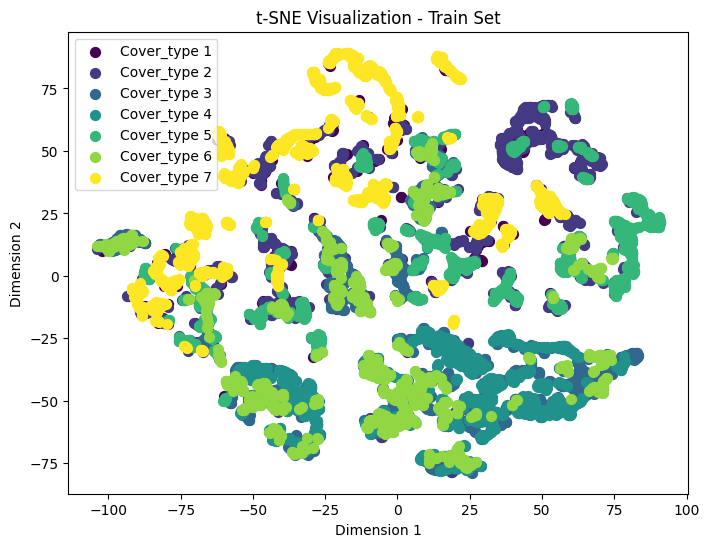

<ipython-input-4-5dbb1f16fb62>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(set(y_data)))  # Change the colormap as needed


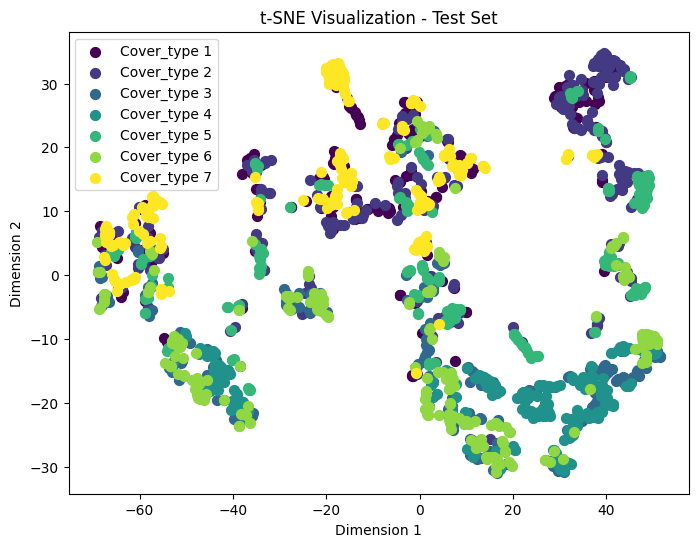

In [23]:
title=['t-SNE Visualization - Train Set','t-SNE Visualization - Test Set']
tens(X_train ,y_train ,title[0])
tens(X_test ,y_test ,title[1])

# Modelling

# Supervised learning Approach

**KNN classifier**

In [24]:
# with standardization of the data
#KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None) default
KNNm=KNeighborsClassifier()
KNNm.fit(X_train ,y_train)
KNN_per=KNNm.predict(X_test)
KNN_accuracy=accuracy_score(y_test ,KNN_per)
KNN_conf=confusion_matrix(y_test ,KNN_per)
print("the accuracy of the KNN is :",KNN_accuracy)

the accuracy of the KNN is : 0.7527868852459016


**Logistic Regression**

In [25]:
#LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None) defaults
lr = LogisticRegression()
lr.fit(X_train ,y_train)
lr_per=lr.predict(X_test)
lr_accuracy=accuracy_score(y_test ,lr_per)
lr_conf=confusion_matrix(y_test ,lr_per)
print("the accuracy of the Logistic Regression is :",lr_accuracy)


the accuracy of the Logistic Regression is : 0.38163934426229507


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**SVM**

In [26]:
svm = SVC()
svm.fit(X_train ,y_train)
svm_per=svm.predict(X_test)
svm_accuracy=accuracy_score(y_test ,svm_per)
svm_conf=confusion_matrix(y_test ,svm_per)
print("the accuracy of the SVM is :",svm_accuracy)

the accuracy of the SVM is : 0.4963934426229508


**DecisionTreeClassifier**

In [27]:
#DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train ,y_train)
dt_per=dt.predict(X_test)
dt_accuracy=accuracy_score(y_test ,dt_per)
dt_conf=confusion_matrix(y_test ,dt_per)
print("the accuracy of the DecisionTreeClassifier is :",dt_accuracy)

the accuracy of the DecisionTreeClassifier is : 0.7632786885245901


**Naive Bayes Classifier**

In [28]:
#Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train ,y_train)
nb_per=nb.predict(X_test)
nb_accuracy=accuracy_score(y_test ,nb_per)
nb_conf=confusion_matrix(y_test ,nb_per)
print("the accuracy of the Naive Bayes Classifier is :",nb_accuracy)

the accuracy of the Naive Bayes Classifier is : 0.6498360655737705


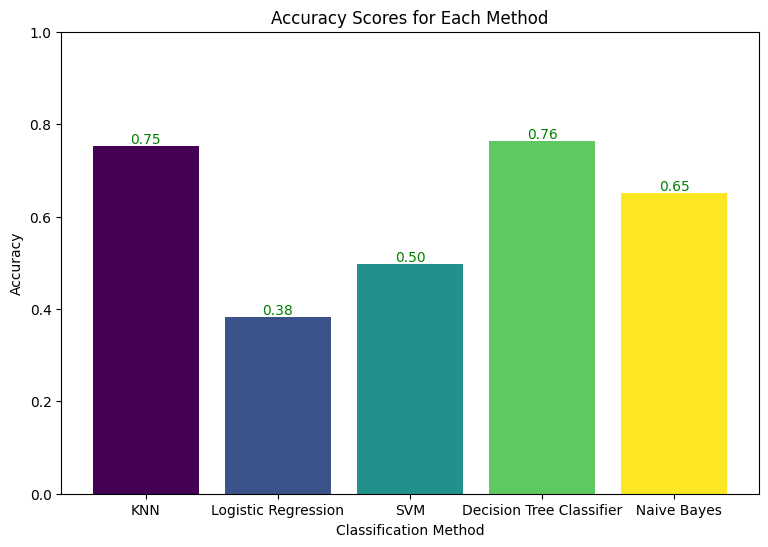

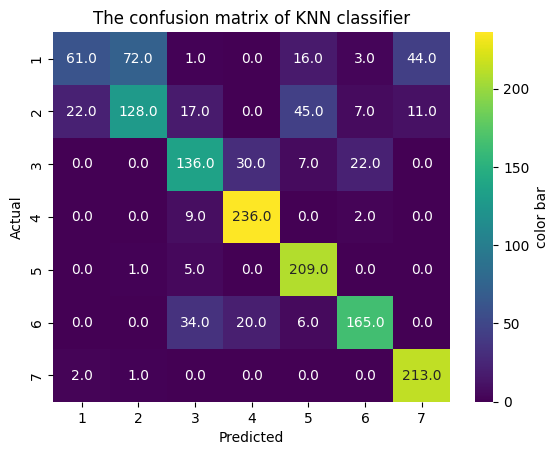

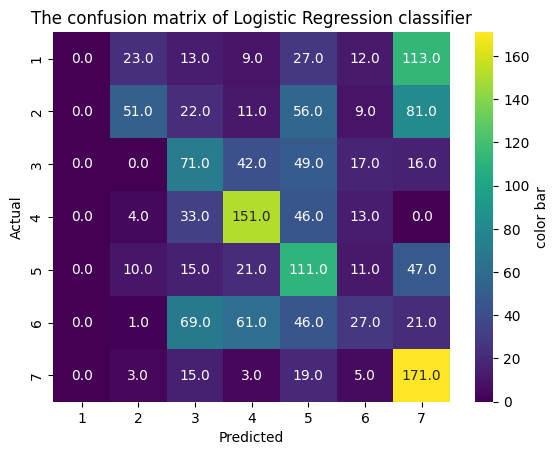

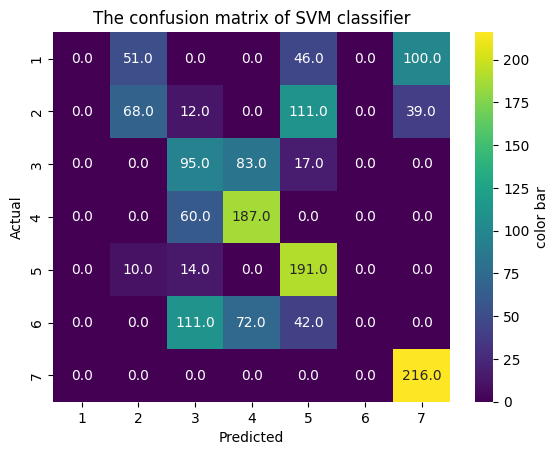

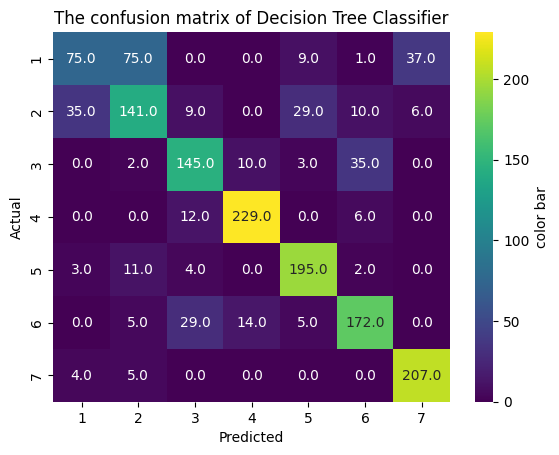

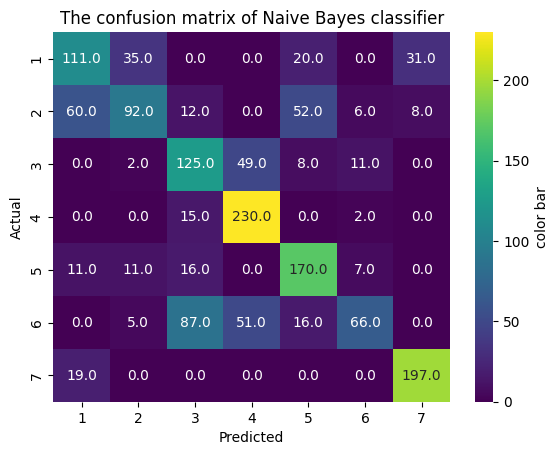

In [29]:
# Plotting a bar chart the accuracy scores
methods = ['KNN', 'Logistic Regression', 'SVM', 'Decision Tree Classifier', '  Naive Bayes']
conv_name = ['The confusion matrix of KNN classifier', 'The confusion matrix of Logistic Regression classifier', 'The confusion matrix of SVM classifier', 'The confusion matrix of Decision Tree Classifier', 'The confusion matrix of Naive Bayes classifier']
accuracies = [KNN_accuracy, lr_accuracy, svm_accuracy, dt_accuracy, nb_accuracy]
confusion_matricxs=[KNN_conf,lr_conf,svm_conf,dt_conf,nb_conf]
# Adding value labels to the bar chart
plt.figure(figsize=(9, 6))
plt.bar_label(plt.bar(methods, accuracies, color = cm.viridis(np.linspace(0, 1, len(accuracies)))), labels=[f"{acc:.2f}" for acc in accuracies], fontsize=10, color="Green")
plt.title('Accuracy Scores for Each Method')
plt.xlabel('Classification Method')
plt.ylabel('Accuracy')
plt.ylim((0, 1))      # It sets the y-axis limits for a plot to be between 0 and 1
plt.show()
for i in range(5):
  plot(confusion_matricxs[i],conv_name[i])

# Feature Engineering with Modelling

# preprocessing of the data

In [30]:
#standarization of data
scale=MinMaxScaler()
#train
X_train_scale =scale.fit_transform(X_train)
# TEST
X_test_scale=scale.transform(X_test)
# THE DATA scaled will be (X_train_scale ,X_test_scale,y_train ,y_test)
# THE DATA with no scalling will be (X_train ,X_test ,y_train ,y_test)


# Filter Method


*   List item
*   List item






question2


In [31]:
from sklearn.feature_selection import SelectKBest, chi2

def filter_feature_selection(model, X_train, X_test, y_train, k):
    selector = SelectKBest(score_func=chi2, k=k)
    X_train_filtered = selector.fit_transform(X_train, y_train)
    X_test_filtered = selector.transform(X_test)

    model.fit(X_train_filtered, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_filtered)

    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    return X_train_filtered, X_test_filtered,accuracy,y_pred

5 features has accuracy = 0.4
6 features has accuracy = 0.44131147540983606
7 features has accuracy = 0.4701639344262295
8 features has accuracy = 0.5134426229508197
9 features has accuracy = 0.5134426229508197
10 features has accuracy = 0.5232786885245901
11 features has accuracy = 0.5822950819672131
12 features has accuracy = 0.5816393442622951
13 features has accuracy = 0.5940983606557377
14 features has accuracy = 0.5940983606557377
15 features has accuracy = 0.5927868852459016
16 features has accuracy = 0.598688524590164
17 features has accuracy = 0.5973770491803279
18 features has accuracy = 0.6045901639344262
19 features has accuracy = 0.6714754098360656
20 features has accuracy = 0.6911475409836065
21 features has accuracy = 0.6885245901639344
22 features has accuracy = 0.6957377049180328
23 features has accuracy = 0.6891803278688524
24 features has accuracy = 0.6898360655737705
25 features has accuracy = 0.6878688524590164
26 features has accuracy = 0.7540983606557377
27 featu

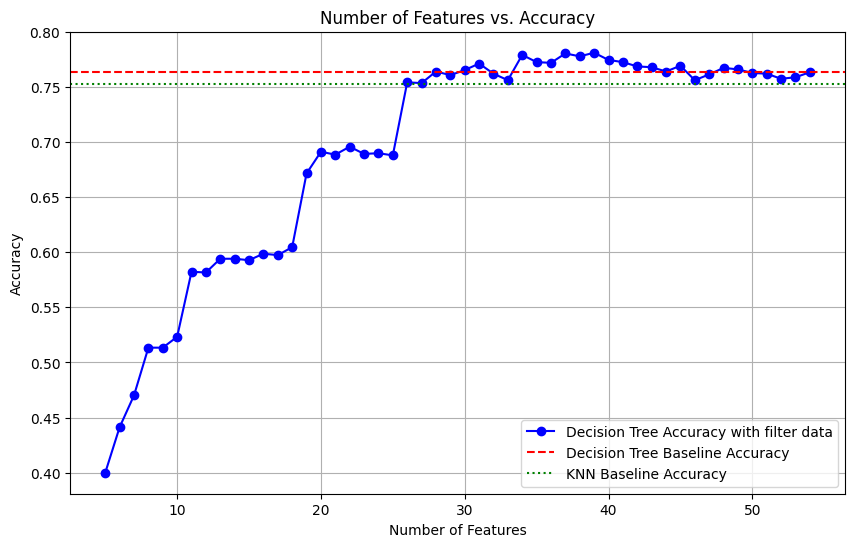

In [32]:
# Assuming you have loaded the data and defined the necessary variables
# X_train_scale, y_train, X_test_scale, y_test, and dt_accuracy
# Initialize a list to store accuracy scores for different feature selection sizes
dt_Baseline=dt_accuracy
KNN_Baseline=KNN_accuracy
d_t_accuracies=[]
number_of_features = 54
best_accuracy_dt_filter = 0
best_num_features_dt_filter = 0

# Loop through different numbers of features from 5 to 55
for num_features in range(5, number_of_features+1):
    # Perform feature selection
    model = DecisionTreeClassifier(random_state=42)  # Default Decision Tree model
    X_train_filtered, X_test_filtered,accuracy,y_pred = filter_feature_selection(model, X_train_scale, X_test_scale, y_train, num_features)

    d_t_accuracies.append(accuracy)
    print(num_features, "features has accuracy =", accuracy)
    # Store the best feature subset
    if accuracy > best_accuracy_dt_filter:
        best_accuracy_dt_filter = accuracy
        best_num_features_dt_filter = num_features

# Get the best feature subset using the number of features that achieved the best accuracy
model = DecisionTreeClassifier(random_state=42)
X_train_best_subset_dt_filter, X_test_best_subset_dt_filter,best_accuracy_dt_filter,BEST_y_pred_DT_Filter = filter_feature_selection(model, X_train_scale, X_test_scale, y_train, best_num_features_dt_filter)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(range(5, number_of_features+1), d_t_accuracies, marker='o', linestyle='-', color='b', label='Decision Tree Accuracy with filter data')
plt.axhline(y=dt_Baseline, color='r', linestyle='--', label='Decision Tree Baseline Accuracy')
plt.axhline(y=KNN_Baseline, color='g', linestyle='dotted', label='KNN Baseline Accuracy ')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
BEST_y_pred_DT_Filter

array([3, 6, 1, ..., 5, 4, 4])

The confision Matrics for the best decision tree model with filtered data"
  [[ 84  70   0   0   9   1  33]
 [ 32 146   6   0  36   6   4]
 [  0   1 148  11   6  29   0]
 [  0   0  15 229   0   3   0]
 [  2  10   3   0 200   0   0]
 [  0   4  30  10   8 173   0]
 [  3   2   0   0   0   0 211]]


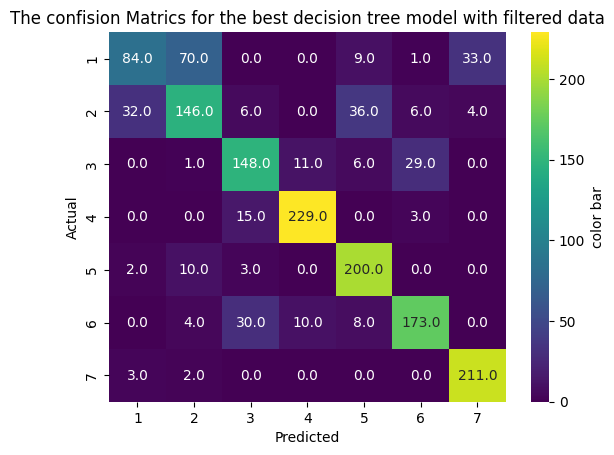

In [34]:
#Plot The confision Matrics for the best decision tree model with filtered data
conf_DT_FILTER=confusion_matrix(y_test, BEST_y_pred_DT_Filter)
print('The confision Matrics for the best decision tree model with filtered data"\n ',conf_DT_FILTER)
title='The confision Matrics for the best decision tree model with filtered data'
plot(conf_DT_FILTER,title)

5 features has accuracy = 0.17573770491803278
6 features has accuracy = 0.17573770491803278
7 features has accuracy = 0.20131147540983607
8 features has accuracy = 0.20131147540983607
9 features has accuracy = 0.20131147540983607
10 features has accuracy = 0.20262295081967213
11 features has accuracy = 0.6091803278688525
12 features has accuracy = 0.6118032786885246
13 features has accuracy = 0.6334426229508197
14 features has accuracy = 0.6334426229508197
15 features has accuracy = 0.6327868852459017
16 features has accuracy = 0.6419672131147541
17 features has accuracy = 0.6419672131147541
18 features has accuracy = 0.6445901639344263
19 features has accuracy = 0.719344262295082
20 features has accuracy = 0.7291803278688525
21 features has accuracy = 0.7324590163934426
22 features has accuracy = 0.7363934426229508
23 features has accuracy = 0.7363934426229508
24 features has accuracy = 0.7377049180327869
25 features has accuracy = 0.741639344262295
26 features has accuracy = 0.775081

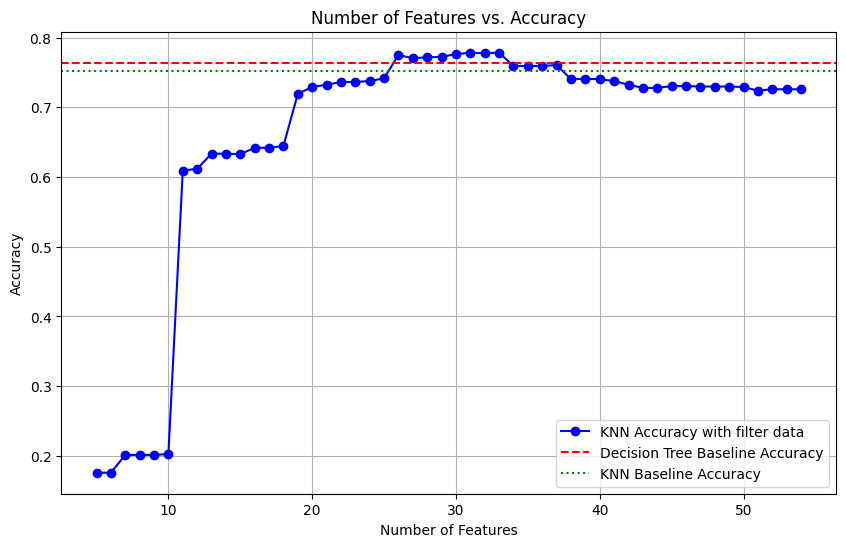

In [35]:
# Assuming you have loaded the data and defined the necessary variables
# X_train_scale, y_train, X_test_scale, y_test, and dt_accuracy

# Initialize a list to store accuracy scores for different feature selection sizes
dt_Baseline=dt_accuracy
KNN_Baseline=KNN_accuracy
knn_accuracies=[]
number_of_features = 54
best_accuracy_knn_filter = 0
best_num_features_knn_filter = 0

# Loop through different numbers of features from 5 to number_of_features
for num_features in range(5, number_of_features + 1):
    # Perform feature selection
    model = KNeighborsClassifier()  # Default KNN model
    X_train_filtered, X_test_filtered, accuracy,y_pred = filter_feature_selection(model, X_train_scale, X_test_scale, y_train, num_features)


    knn_accuracies.append(accuracy)
    print(num_features, "features has accuracy =", accuracy)


    # Store the best feature subset
    if accuracy > best_accuracy_knn_filter:
        best_accuracy_knn_filter = accuracy
        best_num_features_knn_filter = num_features

model = KNeighborsClassifier()
X_train_best_subset_knn_filter, X_test_best_subset_knn_filter,best_accuracy_knn_filter,BEST_y_pred_KNN_Filter = filter_feature_selection(model, X_train_scale, X_test_scale, y_train, best_num_features_knn_filter)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(range(5, number_of_features + 1), knn_accuracies, marker='o', linestyle='-', color='b', label='KNN Accuracy with filter data')
plt.axhline(y=dt_Baseline, color='r', linestyle='--', label='Decision Tree Baseline Accuracy')
plt.axhline(y=KNN_Baseline, color='g', linestyle='dotted', label='KNN Baseline Accuracy ')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
BEST_y_pred_KNN_Filter

array([3, 3, 1, ..., 5, 4, 4])

The confision Matrics for the best KNN model with filtered data"
  [[ 79  73   0   0  15   0  30]
 [ 26 133  10   0  46   9   6]
 [  0   0 150  23   4  18   0]
 [  0   0   6 238   0   3   0]
 [  0   4   6   0 204   1   0]
 [  0   3  26  19   3 174   0]
 [  4   3   0   0   0   0 209]]


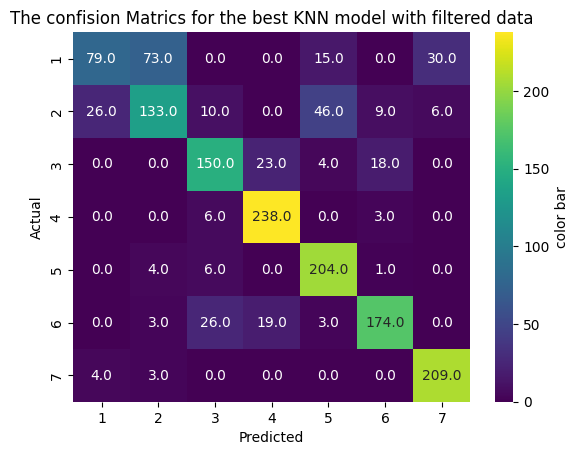

In [37]:
#Plot The confision Matrics for the best KNN model with filtered data
conf_knn_FILTER=confusion_matrix(y_test, BEST_y_pred_KNN_Filter)
print('The confision Matrics for the best KNN model with filtered data"\n ',conf_knn_FILTER)
title='The confision Matrics for the best KNN model with filtered data'
plot(conf_knn_FILTER,title)

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector

def wrapper_feature_selection(model, X_train, X_test, y_train, k):
    # Create the SequentialFeatureSelector with the chosen model and number of features to select
    sfs = SequentialFeatureSelector(model, k_features=k, forward=True, floating=False, scoring='accuracy', cv=0)

    # Fit the selector on the training data
    sfs.fit(X_train, y_train)

    # Get the selected feature indices
    selected_feature_indices = sfs.k_feature_idx_

    # Transform the training and test data to keep only the selected features
    X_train_wrapper = X_train[:, selected_feature_indices]
    X_test_wrapper = X_test[:, selected_feature_indices]

    # Train the model using the selected features
    model.fit(X_train_wrapper, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_wrapper)

    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)

    return X_train_wrapper, X_test_wrapper, accuracy, y_pred


best accuracy is:  0.6911475409836065 when number of features is: 5
best accuracy is:  0.6970491803278689 when number of features is: 6
best accuracy is:  0.7291803278688525 when number of features is: 7
best accuracy is:  0.7291803278688525 when number of features is: 7
best accuracy is:  0.7291803278688525 when number of features is: 7
best accuracy is:  0.7350819672131148 when number of features is: 10
best accuracy is:  0.7475409836065574 when number of features is: 11
best accuracy is:  0.7475409836065574 when number of features is: 11
best accuracy is:  0.7475409836065574 when number of features is: 11
best accuracy is:  0.7547540983606558 when number of features is: 14
best accuracy is:  0.7547540983606558 when number of features is: 14


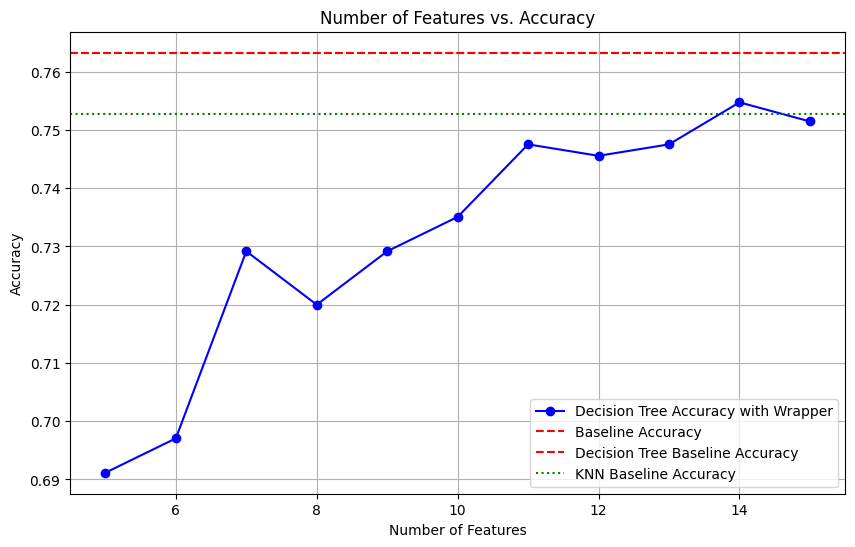

In [39]:
# Initialize a list to store accuracy scores for different feature selection sizes
dt_Baseline=dt_accuracy
KNN_Baseline=KNN_accuracy
d_t_accuracies_wrap = []
number_of_features = 15
best_accuracy_dt_wrapper = 0
best_num_features_dt_wrapper = 0

# Loop through different numbers of features from 5 to 55
for num_features in range(5, number_of_features+1):
    # Perform feature selection
    model = DecisionTreeClassifier(random_state=42)  # Default Decision Tree model
    X_train_filtered, X_test_filtered,accuracy,y_pred = wrapper_feature_selection(model, X_train_scale, X_test_scale, y_train, num_features)

    d_t_accuracies_wrap.append(accuracy)

    # Store the best feature subset
    if accuracy > best_accuracy_dt_wrapper:
        best_accuracy_dt_wrapper = accuracy
        best_num_features_dt_wrapper = num_features
    print("best accuracy is: ",best_accuracy_dt_wrapper, "when number of features is:", best_num_features_dt_wrapper)
# Get the best feature subset using the number of features that achieved the best accuracy
model = DecisionTreeClassifier(random_state=42)
X_train_best_subset_dt_wrapper, X_test_best_subset_dt_wrapper,best_accuracy_dt_wrapper,BEST_y_pred_Dt_wrapper  = wrapper_feature_selection(model, X_train_scale, X_test_scale, y_train, best_num_features_dt_wrapper)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(range(5, number_of_features+1), d_t_accuracies_wrap, marker='o', linestyle='-', color='b', label='Decision Tree Accuracy with Wrapper')
plt.axhline(y=dt_accuracy, color='r', linestyle='--', label='Baseline Accuracy')
plt.axhline(y=dt_Baseline, color='r', linestyle='--', label='Decision Tree Baseline Accuracy')
plt.axhline(y=KNN_Baseline, color='g', linestyle='dotted', label='KNN Baseline Accuracy ')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
BEST_y_pred_Dt_wrapper

array([3, 3, 1, ..., 5, 4, 4])

The confision Matrics for the best decision tree model with wrapper data"
  [[ 71  75   0   0   6   1  44]
 [ 34 146  12   0  26   7   5]
 [  0   4 141  14   3  33   0]
 [  0   0  15 228   0   4   0]
 [  0  13   6   0 195   1   0]
 [  1   5  40  14   4 161   0]
 [  3   4   0   0   0   0 209]]


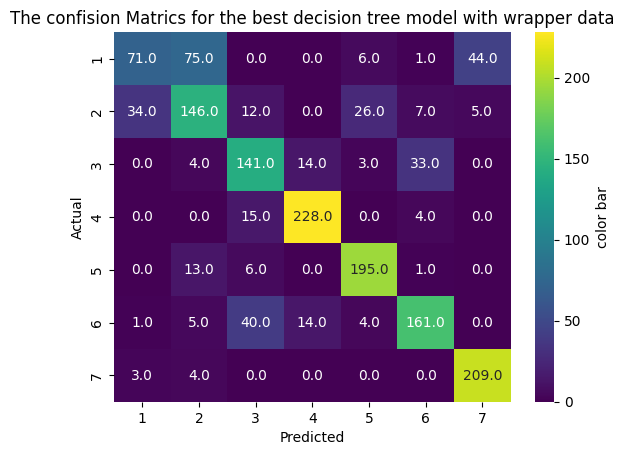

In [41]:
#Plot The confision Matrics for the best decision tree model with filtered data
conf_DT_wrapper=confusion_matrix(y_test, BEST_y_pred_Dt_wrapper)
print('The confision Matrics for the best decision tree model with wrapper data"\n ',conf_DT_wrapper)
title='The confision Matrics for the best decision tree model with wrapper data'
plot(conf_DT_wrapper,title)

In [42]:
dataset1 = pd.DataFrame({
    "Decision Tree (Filter)": {"X_train": X_train_best_subset_dt_filter, "X_test": X_test_best_subset_dt_filter, "accuracy": best_accuracy_dt_filter, "num_features": best_num_features_dt_filter},
    "KNN (Filter)": {"X_train": X_train_best_subset_knn_filter, "X_test": X_test_best_subset_knn_filter, "accuracy": best_accuracy_knn_filter, "num_features": best_num_features_knn_filter},
    "Decision Tree (Wrapper)": {"X_train": X_train_best_subset_dt_wrapper, "X_test": X_test_best_subset_dt_wrapper, "accuracy": best_accuracy_dt_wrapper, "num_features": best_num_features_dt_wrapper} })

In [43]:
dataset1

,Decision Tree (Filter),KNN (Filter),Decision Tree (Wrapper)
X_train,"[[0.5417686354917653, 0.5604229607250755, 0.46...","[[0.5604229607250755, 0.07073715562174236, 0.3...","[[0.5417686354917653, 0.5604229607250755, 0.23..."
X_test,"[[0.5558568688405318, 0.4833836858006042, 0.4,...","[[0.4833836858006042, 0.426656738644825, 0.400...","[[0.5558568688405318, 0.4833836858006042, 0.28..."
accuracy,0.780984,0.778361,0.754754
num_features,39,31,14


In [44]:
dataset1.to_csv('simi_filtered_data.csv')

best accuracy is:  0.7672131147540984 when number of features is: 5
best accuracy is:  0.7704918032786885 when number of features is: 6
best accuracy is:  0.7750819672131147 when number of features is: 7
best accuracy is:  0.7757377049180327 when number of features is: 8
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9


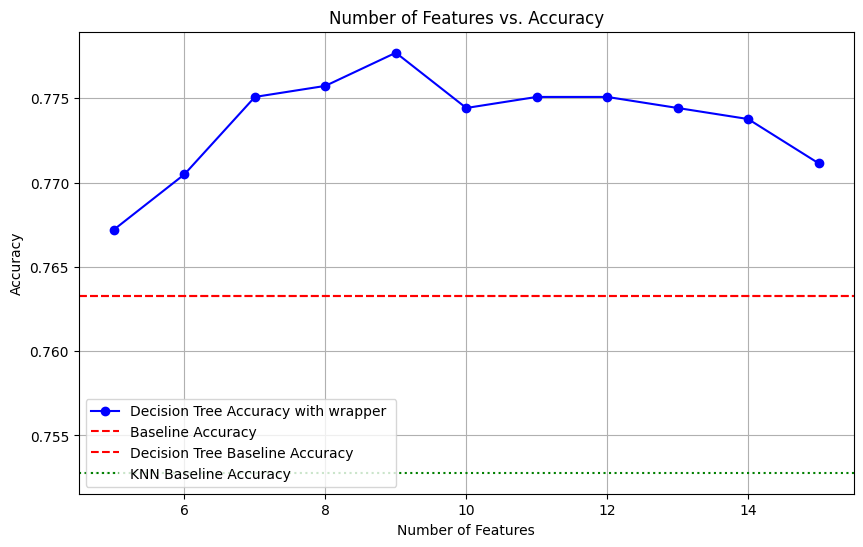

In [45]:
# Initialize a list to store accuracy scores for different feature selection sizes
dt_Baseline=dt_accuracy
KNN_Baseline=KNN_accuracy
Knn_accuracies_wrap = []
number_of_features = 15
best_accuracy_knn_wrapper = 0
best_num_features_knn_wrapper = 0

# Loop through different numbers of features from 5 to 55
for num_features in range(5, number_of_features+1):
    # Perform feature selection
    model = KNeighborsClassifier()  # Default Decision Tree model
    X_train_filtered, X_test_filtered,accuracy,y_pred = wrapper_feature_selection(model, X_train_scale, X_test_scale, y_train, num_features)

    Knn_accuracies_wrap.append(accuracy)

    # Store the best feature subset
    if accuracy > best_accuracy_knn_wrapper:
        best_accuracy_knn_wrapper = accuracy
        best_num_features_knn_wrapper = num_features
    print("best accuracy is: ",best_accuracy_knn_wrapper, "when number of features is:", best_num_features_knn_wrapper)
# Get the best feature subset using the number of features that achieved the best accuracy
model = KNeighborsClassifier()
X_train_best_subset_knn_wrapper, X_test_best_subset_knn_wrapper,best_accuracy_knn_wrapper,BEST_y_pred_KNN_wrapper  = wrapper_feature_selection(model, X_train_scale, X_test_scale, y_train, best_num_features_knn_wrapper)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(range(5, number_of_features+1), Knn_accuracies_wrap, marker='o', linestyle='-', color='b', label='Decision Tree Accuracy with wrapper ')
plt.axhline(y=dt_accuracy, color='r', linestyle='--', label='Baseline Accuracy')
plt.axhline(y=dt_Baseline, color='r', linestyle='--', label='Decision Tree Baseline Accuracy')
plt.axhline(y=KNN_Baseline, color='g', linestyle='dotted', label='KNN Baseline Accuracy ')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

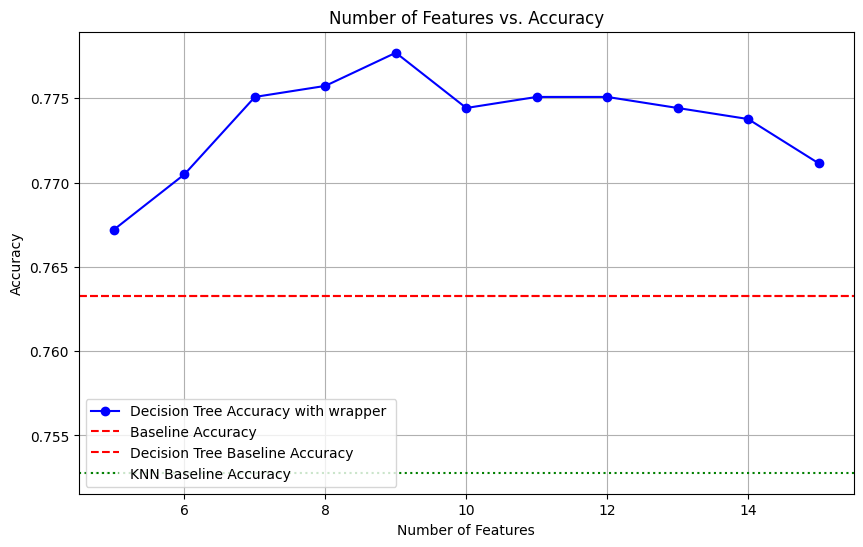

In [46]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(range(5, number_of_features+1), Knn_accuracies_wrap, marker='o', linestyle='-', color='b', label='Decision Tree Accuracy with wrapper ')
plt.axhline(y=dt_accuracy, color='r', linestyle='--', label='Baseline Accuracy')
plt.axhline(y=dt_Baseline, color='r', linestyle='--', label='Decision Tree Baseline Accuracy')
plt.axhline(y=KNN_Baseline, color='g', linestyle='dotted', label='KNN Baseline Accuracy ')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
BEST_y_pred_KNN_wrapper

array([5, 3, 2, ..., 5, 3, 4])

The confision Matrics for the best KNN model with wrapper data"
  [[ 73  73   0   0   8   0  43]
 [ 16 142  11   0  42  11   8]
 [  0   2 148  21   6  18   0]
 [  0   0  12 232   0   3   0]
 [  0   4   4   0 207   0   0]
 [  0   0  27  21   4 173   0]
 [  3   2   0   0   0   0 211]]


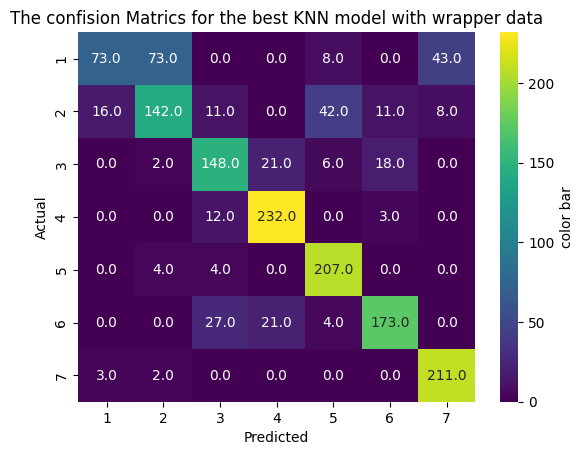

In [48]:
#Plot The confision Matrics for the best KNN model with wrapper data
conf_knn_wrapper=confusion_matrix(y_test, BEST_y_pred_KNN_wrapper)
print('The confision Matrics for the best KNN model with wrapper data"\n ',conf_knn_wrapper)
title='The confision Matrics for the best KNN model with wrapper data'
plot(conf_knn_wrapper,title)

In [49]:
#filter    X_train_best_subset_dt_filter, X_test_best_subset_dt_filter,best_accuracy_dt_filter,BEST_y_pred_DT_Filter  best_accuracy_dt_filter  ,best_num_features_dt_filter
#filter    X_train_best_subset_knn_filter, X_test_best_subset_knn_filter,best_accuracy_knn_filter,BEST_y_pred_KNN_Filter ,best_accuracy_knn_filter ,best_num_features_knn_filter
#wrapper   X_train_best_subset_dt_wrapper, X_test_best_subset_dt_wrapper,best_accuracy_dt_wrapper,BEST_y_pred_Dt_wrapper ,best_accuracy_dt_wrapper, best_num_features_dt_wrapper
#wrapper   X_train_best_subset_knn_wrapper, X_test_best_subset_knn_wrapper,best_accuracy_knn_wrapper,BEST_y_pred_KNN_wrapper ,best_accuracy_knn_wrapper best_num_features_knn_wrapper

print(X_train_best_subset_dt_filter)
print(X_test_best_subset_dt_filter)
print(best_accuracy_dt_filter )
print(best_num_features_dt_filter)
#..................................
print(X_train_best_subset_knn_filter)
print(X_test_best_subset_knn_filter)
print(best_accuracy_knn_filter )
print(best_num_features_knn_filter )
#.............................
print(X_train_best_subset_dt_wrapper)
print(X_test_best_subset_dt_wrapper)
print(best_accuracy_dt_wrapper )
print(best_num_features_dt_wrapper)
#......................
print(X_train_best_subset_knn_wrapper)
print(X_test_best_subset_knn_wrapper)
print(best_accuracy_knn_wrapper )
print(best_num_features_knn_wrapper )
datasets =pd.DataFrame({
    "Decision Tree (Filter)": {"X_train": X_train_best_subset_dt_filter, "X_test": X_test_best_subset_dt_filter, "accuracy": best_accuracy_dt_filter, "num_features": best_num_features_dt_filter},
    "KNN (Filter)": {"X_train": X_train_best_subset_knn_filter, "X_test": X_test_best_subset_knn_filter, "accuracy": best_accuracy_knn_filter, "num_features": best_num_features_knn_filter},
    "Decision Tree (Wrapper)": {"X_train": X_train_best_subset_dt_wrapper, "X_test": X_test_best_subset_dt_wrapper, "accuracy": best_accuracy_dt_wrapper, "num_features": best_num_features_dt_wrapper},
    "KNN (Wrapper)": {"X_train": X_train_best_subset_knn_wrapper, "X_test": X_test_best_subset_knn_wrapper, "accuracy": best_accuracy_knn_wrapper, "num_features": best_num_features_knn_wrapper}
})

# Find the dataset with the best accuracy
best_dataset = max(datasets, key=lambda x: datasets[x]["accuracy"])

# Print the best dataset information
print("Best Dataset: ", best_dataset)
print("Accuracy: ", datasets[best_dataset]["accuracy"])
print("Number of Features: ", datasets[best_dataset]["num_features"])

[[0.54176864 0.56042296 0.46       ... 0.         0.         0.        ]
 [0.93180766 0.62487412 0.24       ... 0.         0.         0.        ]
 [0.67762418 0.76636455 0.14       ... 0.         0.         0.        ]
 ...
 [0.61049011 0.74874119 0.36       ... 1.         0.         0.        ]
 [0.63860044 0.93856999 0.34       ... 0.         0.         1.        ]
 [0.13334215 0.7633434  0.         ... 0.         1.         0.        ]]
[[0.55585687 0.48338369 0.4        ... 0.         0.         0.        ]
 [0.87433031 0.29707956 0.14       ... 0.         0.         0.        ]
 [0.5059197  0.6510574  0.12       ... 0.         0.         0.        ]
 ...
 [0.15523513 0.46374622 0.24       ... 0.         0.         0.        ]
 [0.82154904 0.24169184 0.28       ... 0.         0.         0.        ]
 [0.23817713 0.12134945 0.18       ... 0.         0.         0.        ]]
0.7809836065573771
39
[[0.56042296 0.07073716 0.37430854 ... 0.         0.         0.        ]
 [0.62487412 0.11

In [50]:
datasets.to_csv('Feature_data.csv')

In [51]:
datasets.to_csv('Feature_data.csv')

# Q3

**Random Forest model**

In [52]:
X_train = X_train_best_subset_knn_wrapper
X_test = X_test_best_subset_knn_wrapper

Random Forest accuracy: 0.800655737704918
The confision Matrics for RandomForestClassifier model"
  [[ 74  67   0   0   8   0  48]
 [ 18 156   9   0  34   6   7]
 [  0   0 156  18   4  17   0]
 [  0   0   8 235   0   4   0]
 [  0   2   3   0 210   0   0]
 [  0   0  30  20   1 174   0]
 [  0   0   0   0   0   0 216]]


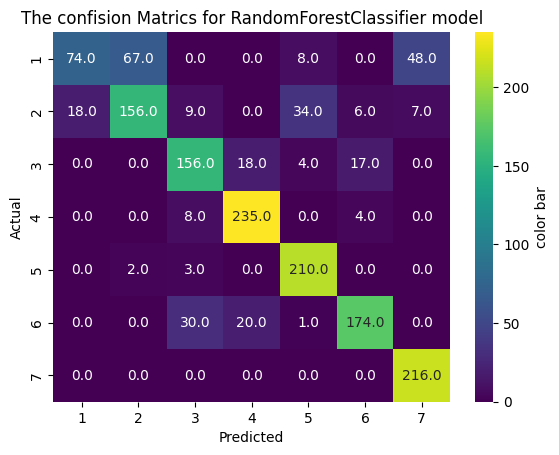

In [53]:
# RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest accuracy:", accuracy_rf)
#Plot The confision Matrics for RandomForestClassifier model
conf_RF=confusion_matrix(y_test, y_pred_rf)
print('The confision Matrics for RandomForestClassifier model"\n ',conf_RF)
title='The confision Matrics for RandomForestClassifier model'
plot(conf_RF,title)

i choosed the Random forrest
so i will take the predections of it as xtrain and xtest for the pki method
later we will concatenate them with the output of the sofm


In [54]:
X_test_rf = y_pred_rf
X_train_rf = rf_model.predict(X_train)

**AdaBoost model**

AdaBoost accuracy: 0.40524590163934426
The confision Matrics for AdaBoost model"
  [[ 39   1   0   0  81   0  76]
 [ 20   1  22   0 169   0  18]
 [  0   0 167  11  17   0   0]
 [  0   0 246   0   1   0   0]
 [  0   0  15   0 200   0   0]
 [  0   0 191   7  27   0   0]
 [  5   0   0   0   0   0 211]]


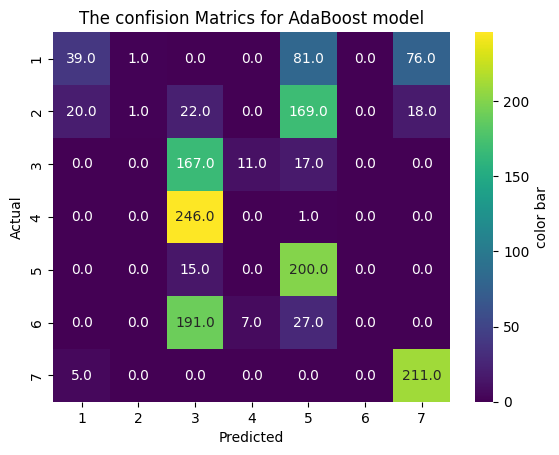

In [55]:
# Train AdaBoost model
#AdaBoostClassifier(estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None, base_estimator='deprecated')
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost accuracy:", accuracy_ada)
#Plot The confision Matrics for RandomForestClassifier model
conf_ADA=confusion_matrix(y_test, y_pred_ada)
print('The confision Matrics for AdaBoost model"\n ',conf_ADA)
title='The confision Matrics for AdaBoost model'
plot(conf_ADA,title)

**Gradient Boosting model**

Gradient Boosting accuracy: 0.7219672131147541
The confision Matrics for Gradient Boosting model"
  [[ 55  74   0   0  13   0  55]
 [ 30 124  12   0  46   6  12]
 [  1   0 143  24   7  20   0]
 [  0   0  13 225   0   9   0]
 [  0   4   4   0 205   2   0]
 [  0   0  52  23  16 134   0]
 [  0   1   0   0   0   0 215]]


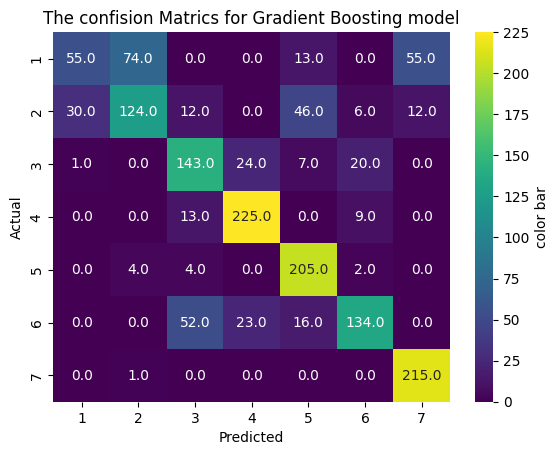

In [56]:
# Train Gradient Boosting model
# GradientBoostingClassifier( loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
gb_model = GradientBoostingClassifier(random_state=42 )
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting accuracy:", accuracy_gb)
#Plot The confision Matrics for RandomForestClassifier model
conf_GB=confusion_matrix(y_test, y_pred_gb)
print('The confision Matrics for Gradient Boosting model"\n ',conf_GB)
title='The confision Matrics for Gradient Boosting model'
plot(conf_GB,title)

Q4


# Unsupervised learning Approach

#SOFM

In [57]:
pip install MiniSom


In [58]:
from minisom import MiniSom
import numpy as np

# Define the SOFM grid size (number of neurons)
grid_sizes = [(6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12)]

def train_sofm(X_train, grid_size):
    # Initialize the SOFM with the specified grid size
    som = MiniSom(grid_size[0], grid_size[1], X_train.shape[1], sigma=1.0, learning_rate=0.5)

    # Randomly initialize the weights
    som.random_weights_init(X_train)

    # Train the SOFM on the training data
    som.train_batch(X_train, num_iteration=100)

    return som

# Train the SOFM for each grid size and store them in a dictionary
sofm_models = {}
for grid_size in grid_sizes:
    sofm_models[grid_size] = train_sofm(X_train, grid_size)

# Use the trained SOFM models to transform the training and test data
def transform_sofm(som, data):
    transformed_data = np.array([som.winner(datum) for datum in data])
    return transformed_data

X_train_sofm = {}
X_test_sofm = {}

for grid_size, som in sofm_models.items():
    X_train_sofm[grid_size] = transform_sofm(som, X_train)
    X_test_sofm[grid_size] = transform_sofm(som, X_test)


In [59]:
import pandas as pd

# Convert transformed data to DataFrames
X_train_sofm_df = {}
X_test_sofm_df = {}

for grid_size, transformed_train_data in X_train_sofm.items():
    X_train_sofm_df[grid_size] = pd.DataFrame(transformed_train_data, columns=[f'Cluster_{i}' for i in range(transformed_train_data.shape[1])])

for grid_size, transformed_test_data in X_test_sofm.items():
    X_test_sofm_df[grid_size] = pd.DataFrame(transformed_test_data, columns=[f'Cluster_{i}' for i in range(transformed_test_data.shape[1])])

# Apply one-hot encoding to the DataFrame
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
for grid_size in grid_sizes:
    # Fit and transform the training data
    X_train_sofm_encoded = onehot_encoder.fit_transform(X_train_sofm_df[grid_size]).toarray()
    X_train_sofm_encoded_df = pd.DataFrame(X_train_sofm_encoded, columns=[f'Cluster_{i}' for i in range(X_train_sofm_encoded.shape[1])])

    # Transform the test data
    X_test_sofm_encoded = onehot_encoder.transform(X_test_sofm_df[grid_size]).toarray()
    X_test_sofm_encoded_df = pd.DataFrame(X_test_sofm_encoded, columns=[f'Cluster_{i}' for i in range(X_test_sofm_encoded.shape[1])])

    # Update the DataFrames with the one-hot encoded features
    X_train_sofm_df[grid_size] = pd.concat([X_train_sofm_df[grid_size], X_train_sofm_encoded_df], axis=1)
    X_test_sofm_df[grid_size] = pd.concat([X_test_sofm_df[grid_size], X_test_sofm_encoded_df], axis=1)


In [60]:
X_test_rf_df = pd.DataFrame(X_test_rf, columns=["Predicted_RF"])
X_train_rf_df = pd.DataFrame(X_train_rf, columns=["Predicted_RF"])


In [61]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming you have already imported numpy as np

# Convert the arrays to DataFrames
X_test_rf_df = pd.DataFrame(X_test_rf, columns=["Predicted_RF"])
X_train_rf_df = pd.DataFrame(X_train_rf, columns=["Predicted_RF"])

# Combine the test and train DataFrames to fit the encoder on both sets
combined_df = pd.concat([X_train_rf_df, X_test_rf_df])

# Create an instance of the OneHotEncoder
onehot_encoder = OneHotEncoder()

# Fit and transform the combined DataFrame
combined_encoded = onehot_encoder.fit_transform(combined_df).toarray()

# Convert the one-hot encoded array back to DataFrames for test and train sets
X_train_rf_encoded_df = pd.DataFrame(combined_encoded[:X_train_rf_df.shape[0]], columns=onehot_encoder.get_feature_names_out(["Predicted_RF"]))
X_test_rf_encoded_df = pd.DataFrame(combined_encoded[X_train_rf_df.shape[0]:], columns=onehot_encoder.get_feature_names_out(["Predicted_RF"]))


In [62]:
# Combine the encoded DataFrames of SOFM and RF predictions
X_train_combined_df = pd.concat([X_train_sofm_df[grid_size], X_train_rf_encoded_df], axis=1)
X_test_combined_df = pd.concat([X_test_sofm_df[grid_size], X_test_rf_encoded_df], axis=1)

# Store the combined DataFrames in a new dictionary
combined_dataframes = {}
for grid_size in grid_sizes:
    combined_dataframes[grid_size] = {
        "X_train": X_train_combined_df,
        "X_test": X_test_combined_df
    }


some features are not encoded yet


In [63]:
# Perform one-hot label encoding for all DataFrames in the combined_dataframes dictionary
for grid_size, dataframes_dict in combined_dataframes.items():
    for dataset_type, dataframe in dataframes_dict.items():
        # Perform one-hot encoding
        encoded_df = pd.get_dummies(dataframe, columns=dataframe.columns)

        # Update the dictionary with the one-hot encoded DataFrame
        combined_dataframes[grid_size][dataset_type] = encoded_df


now all data are will prepared and we can start the training


In [64]:
import tensorflow as tf
from tensorflow import keras

def create_pki_model(input_shape, num_hidden_layers=4, num_neurons=30, activation='tanh', learning_rate=0.001):
    model = keras.Sequential()

    # Add the input layer
    model.add(keras.layers.InputLayer(input_shape=input_shape))

    # Add the hidden layers
    for _ in range(num_hidden_layers):
        model.add(keras.layers.Dense(num_neurons, activation=activation))

    # Add the output layer
    model.add(keras.layers.Dense(1, activation='linear'))  # Assuming the output is regression, change activation if classification

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    return model

# Assuming input_shape is the number of features in the combined DataFrame (after one-hot encoding)
input_shape = X_train_combined_df.shape[1]

# Create the PKI model
pki_model = create_pki_model(input_shape)


In [65]:
# Find the maximum number of features across all one-hot encoded DataFrames
max_features = max(df.shape[1] for grid_size in grid_sizes for df in combined_dataframes[grid_size].values())

# Set the correct input_shape
input_shape = max_features

# Create the dictionary to store trained PKI models
trained_pki_models = {}

# Prepare the input (X) and output (y) data for training
X_train_all = pd.concat([combined_dataframes[grid_size]["X_train"] for grid_size in grid_sizes], axis=0)
y_train_all = y_train.repeat(len(grid_sizes))

# Train the PKI model for each SOFM grid size
print(grid_sizes)
for i, grid_size in enumerate(grid_sizes):
    print(i)
    print(grid_size)
    X_train_grid_size = combined_dataframes[grid_size]["X_train"]
    y_train_grid_size = y_train_all.iloc[i * len(X_train_grid_size):(i + 1) * len(X_train_grid_size)]

    # Create the PKI model for the specific grid size
    pki_model = create_pki_model(input_shape)

    # Train the PKI model
    pki_model.fit(X_train_grid_size, y_train_grid_size, epochs=100, batch_size=32, verbose=0)

    # Store the trained model in the dictionary
    trained_pki_models[grid_size] = pki_model


[(6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12)]
0
(6, 6)
1
(7, 7)
2
(8, 8)
3
(9, 9)
4
(10, 10)
5
(11, 11)
6
(12, 12)


trying for only 6*6


In [66]:

X_train_6x6 = combined_dataframes[(6, 6)]["X_train"]
y_train_6x6 = y_train

# Create the PKI model for grid size (6,6) and specify the accuracy metric
pki_model_6x6 = create_pki_model(X_train_6x6.shape[1])
pki_model_6x6.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the PKI model on the (6,6) data
pki_model_6x6.fit(X_train_6x6, y_train_6x6, epochs=100, batch_size=32, verbose=0)



In [67]:

X_test_6x6 = combined_dataframes[(6, 6)]["X_test"]
y_test_6x6 = y_test

# Predict labels for the test data using the trained PKI model (6*6)
y_pred_test_6x6 = pki_model_6x6.predict(X_test_6x6)
y_pred_test_6x6 = np.round(y_pred_test_6x6).flatten()  # Convert predictions to binary (if classification)

# Calculate accuracy manually
correct_predictions_test = np.sum(y_pred_test_6x6 == y_test_6x6)
total_samples_test = len(y_test_6x6)
accuracy_test = correct_predictions_test / total_samples_test

# Print the accuracy on test data (6*6)
print("Accuracy on (6,6) test data:", accuracy_test)


48/48 [==============================] - 0s 2ms/step
Accuracy on (6,6) test data: 0.800655737704918


In [68]:
# Define a dictionary to store trained PKI models
trained_pki_models = {}

# Iterate through all grid sizes and train the PKI models
for grid_size in grid_sizes:
    X_train_grid_size = combined_dataframes[grid_size]["X_train"]
    y_train_grid_size = y_train
    print(grid_size)
    # Create the PKI model for the current grid size and specify the accuracy metric
    pki_model = create_pki_model(X_train_grid_size.shape[1])
    pki_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

    # Train the PKI model on the current grid size data
    pki_model.fit(X_train_grid_size, y_train_grid_size, epochs=100, batch_size=32, verbose=0)

    # Store the trained PKI model in the dictionary
    trained_pki_models[grid_size] = pki_model


(6, 6)
(7, 7)
(8, 8)
(9, 9)
(10, 10)
(11, 11)
(12, 12)


In [69]:
# Define a dictionary to store test accuracies for each grid size
test_accuracies = {}

# Iterate through all grid sizes and test the PKI models
for grid_size in grid_sizes:
    X_test_grid_size = combined_dataframes[grid_size]["X_test"]
    y_test_grid_size = y_test

    # Get the corresponding trained PKI model
    pki_model = trained_pki_models[grid_size]

    # Predict labels for the test data using the trained PKI model
    y_pred_test_grid_size = pki_model.predict(X_test_grid_size)
    y_pred_test_grid_size = np.round(y_pred_test_grid_size).flatten()  # Convert predictions to binary (if classification)

    # Calculate accuracy manually
    accuracy = accuracy_score(y_test, y_pred_test_grid_size)

    # Store the accuracy in the dictionary
    test_accuracies[grid_size] = accuracy

# Print the test accuracies for all grid sizes
for grid_size, accuracy in test_accuracies.items():
    print(f"Accuracy on ({grid_size[0]},{grid_size[1]}) test data: {accuracy}")


48/48 [==============================] - 0s 1ms/step
Accuracy on (6,6) test data: 0.800655737704918
Accuracy on (7,7) test data: 0.800655737704918
Accuracy on (8,8) test data: 0.800655737704918
Accuracy on (9,9) test data: 0.800655737704918
Accuracy on (10,10) test data: 0.800655737704918
Accuracy on (11,11) test data: 0.800655737704918
Accuracy on (12,12) test data: 0.800655737704918


the accuracy difference is smaller than we can notice

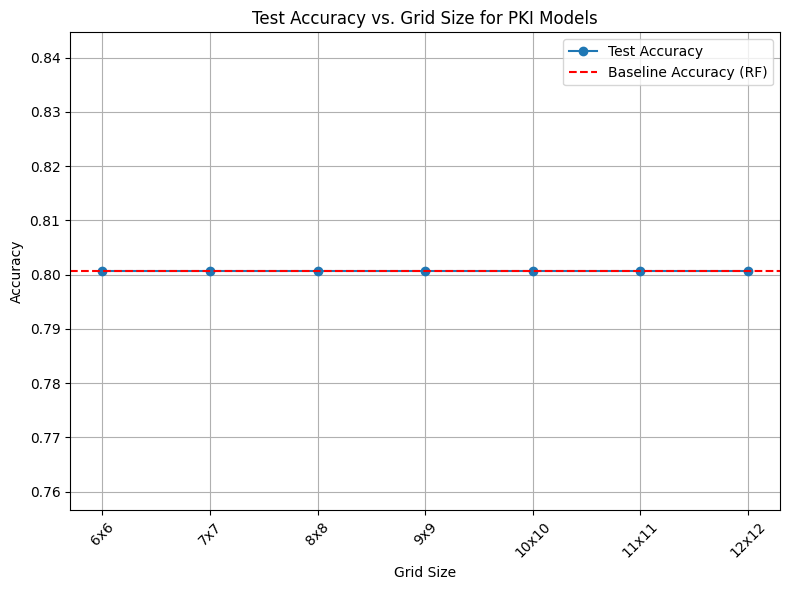

In [70]:
import matplotlib.pyplot as plt

# accuracy_rf is a stored variable representing the baseline accuracy

# Create lists to store grid sizes and corresponding test accuracies
grid_sizes_list = []
test_accuracies_list = []

# Append the grid sizes and test accuracies to the lists
for grid_size, accuracy in test_accuracies.items():
    grid_sizes_list.append(f"{grid_size[0]}x{grid_size[1]}")
    test_accuracies_list.append(accuracy)

# Plot the figure comparing accuracy with the grid size
plt.figure(figsize=(8, 6))
plt.plot(grid_sizes_list, test_accuracies_list, marker='o', label='Test Accuracy')
plt.axhline(y=accuracy_rf, color='red', linestyle='--', label='Baseline Accuracy (RF)')

plt.xlabel('Grid Size')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs. Grid Size for PKI Models')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Question 5


In [71]:
def create_pki_model(input_shape, num_hidden_layers, num_neurons, activation='tanh', learning_rate=0.001):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=input_shape))  # Make sure input_shape matches the number of features

    # Add the hidden layers
    if isinstance(num_neurons, int):
        model.add(keras.layers.Dense(num_neurons, activation=activation))
    elif isinstance(num_neurons, list):
        for num_neurons_layer in num_neurons:
            model.add(keras.layers.Dense(num_neurons_layer, activation=activation))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

    return model


In [72]:

def create_pki_model(input_shape, num_hidden_layers=4, num_neurons=30, activation='tanh', learning_rate=0.001):
    model = keras.Sequential()

    # Add the input layer
    model.add(keras.layers.InputLayer(input_shape=input_shape))

    # Add the hidden layers
    for _ in range(num_hidden_layers):
        model.add(keras.layers.Dense(num_neurons, activation=activation))

    # Add the output layer
    model.add(keras.layers.Dense(1, activation='linear'))  # Assuming the output is regression, change activation if classification

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    return model

In [73]:
# Define a list of different DNN structures to experiment with
dnn_structures = [
    {'num_hidden_layers': 1, 'num_neurons': 30},
    {'num_hidden_layers': 2, 'num_neurons': [30, 20]},
    {'num_hidden_layers': 3, 'num_neurons': [50, 40, 30]}
]  # Add more DNN structures as needed

# Define a dictionary to store the performances of each DNN structure
performance_dict = {}
X_train = combined_dataframes[(6, 6)]["X_train"]
X_test = combined_dataframes[(6, 6)]["X_test"]
# Iterate through different DNN structures
for dnn_structure in dnn_structures:
    num_hidden_layers = dnn_structure['num_hidden_layers']
    num_neurons = dnn_structure['num_neurons']

    # Create the PKI model with the current DNN structure
    pki_model = create_pki_model(X_train.shape[1], num_hidden_layers, num_neurons)  # Pass the correct input shape

    # Compile and train the PKI model on the training data
    pki_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Predict labels for the test data using the trained PKI model
    y_pred_test = pki_model.predict(X_test)
    y_pred_test = np.round(y_pred_test).flatten()  # Convert predictions to binary (if classification)

    # Calculate accuracy manually
    accuracy = accuracy_score(y_test, y_pred_test)

    # Store the accuracy for the current DNN structure
    performance_dict[str(dnn_structure)] = accuracy



48/48 [==============================] - 0s 1ms/step


TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt
performance_dict = {}
X_train = combined_dataframes[(6, 6)]["X_train"]
X_test = combined_dataframes[(6, 6)]["X_test"]
# Define a range of configurations for hidden layers and neurons in each hidden layer
hidden_layers_configs = [(1, 30), (2, 30), (3, 30), (2, 50), (3, 50)]

# Define a range of values for epochs, batches, and learning rate
epochs_values = [50, 100, 150]
batches_values = [16, 32, 64]
learning_rates = [0.001, 0.01, 0.1]

# Initialize variables to store the best accuracy and configuration
best_accuracy = 0.0
best_config = None

# Define the baseline accuracy obtained from previous stages (you need to replace this with the actual baseline accuracy)
baseline_accuracy = accuracy_rf

# Loop through different configurations and training parameters
for config in hidden_layers_configs:
    for epochs in epochs_values:
        for batch_size in batches_values:
            for learning_rate in learning_rates:
                # Create and compile the PKI model for the current configuration and parameters
                create_pki_model(X_train.shape[1])
                pki_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                                  loss='mean_squared_error',
                                  metrics=['accuracy'])

                # Train the PKI model on the training data
                pki_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                # Predict labels for the test data using the trained PKI model
                y_pred_test = pki_model.predict(X_test)
                y_pred_test = np.round(y_pred_test).flatten()  # Convert predictions to binary (if classification)

                 # Calculate accuracy manually
                accuracy = accuracy_score(y_test, y_pred_test)

                # Check if the current model's accuracy is better than the best accuracy so far
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_config = (config, epochs, batch_size, learning_rate)

# Print the best accuracy and configuration
print("Best Accuracy:", best_accuracy)
print("Best Configuration:", best_config)

# Plot the performance of different configurations with the baseline accuracy as a red dotted line
plt.figure(figsize=(10, 6))
for config in hidden_layers_configs:
    x_values = [f"{config[0]} HL, {config[1]} Neurons, Epochs={epochs}, Batch={batch_size}, LR={learning_rate}"
                for epochs in epochs_values
                for batch_size in batches_values
                for learning_rate in learning_rates]
    y_values = [best_accuracy] * len(x_values)
    plt.plot(x_values, y_values, 'r--')
plt.xlabel('Configurations')
plt.ylabel('Accuracy')
plt.title('PKI Model Performance with Different Configurations')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()
